# Fashion MNIST Classification

## Objective

The objective of this project is to develop a Convolutional Neural Network (CNN) to classify images from the Fashion MNIST dataset. The goal is to achieve high accuracy in predicting the category of clothing items, while also understanding the model's internal workings through feature map analysis.

# Load Libraries

In [ ]:
# Installing Visual Keras
!pip install visualkeras
import visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 8.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, ZeroPadding2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import classification_report

import requests
from PIL import Image
from io import BytesIO

# Load MNIST dataset

In [ ]:
!gdown --id 1UM5oxwPA9xqXyHhPLMpFnAlgGAbN6uHv
!gdown --id 1lhaAYd8nDDN1kB_LEjt8n48956jopwGc
!gdown --id 1zU7Op1vUFXsI35DHGwMDcTkHhSYOFNAG
!gdown --id 11F4o0FrtPTewBIr7HiiBtGuA4Uv_cDPO

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1UM5oxwPA9xqXyHhPLMpFnAlgGAbN6uHv
To: /content/t10k-images-idx3-ubyte.gz
100% 4.42M/4.42M [00:00<00:00, 212MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1lhaAYd8nDDN1kB_LEjt8n48956jopwGc
To: /content/t10k-labels-idx1-ubyte.gz
100% 5.15k/5.15k [00:00<00:00, 21.0MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downlo

In [ ]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [ ]:
X_train, y_train = load_mnist('', kind='train')
X_test, y_test = load_mnist('', kind='t10k')

# Dataset Overview

In [ ]:
# Reshape (28, 28)
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28)

In [ ]:
# Print the shape of the training and test datasets
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)
print("=======================================")

# Get unique values in y_train and y_test
unique_values_train = np.unique(y_train)
unique_values_test = np.unique(y_test)
print("Unique values in y_train:", unique_values_train)
print("Unique values in y_test:", unique_values_test)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)
Unique values in y_train: [0 1 2 3 4 5 6 7 8 9]
Unique values in y_test: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

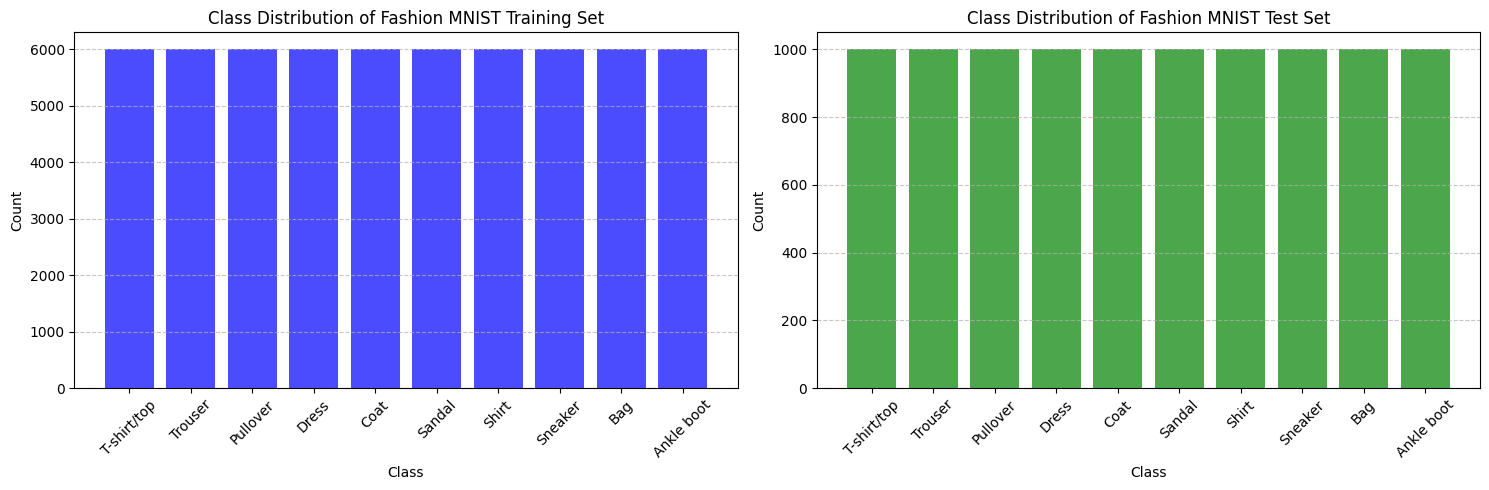

In [ ]:
# Create a figure with subplots for training and test set class distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the value count of each category in y_train
ax1.hist(y_train, bins=np.arange(11)-0.5, rwidth=0.8, color='blue', alpha=0.7)
ax1.set_xticks(range(10))
ax1.set_xticklabels(class_names, rotation=45)
ax1.set_title('Class Distribution of Fashion MNIST Training Set')
ax1.set_xlabel('Class')
ax1.set_ylabel('Count')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Plot the value count of each category in y_test
ax2.hist(y_test, bins=np.arange(11)-0.5, rwidth=0.8, color='green', alpha=0.7)
ax2.set_xticks(range(10))
ax2.set_xticklabels(class_names, rotation=45)
ax2.set_title('Class Distribution of Fashion MNIST Test Set')
ax2.set_xlabel('Class')
ax2.set_ylabel('Count')
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

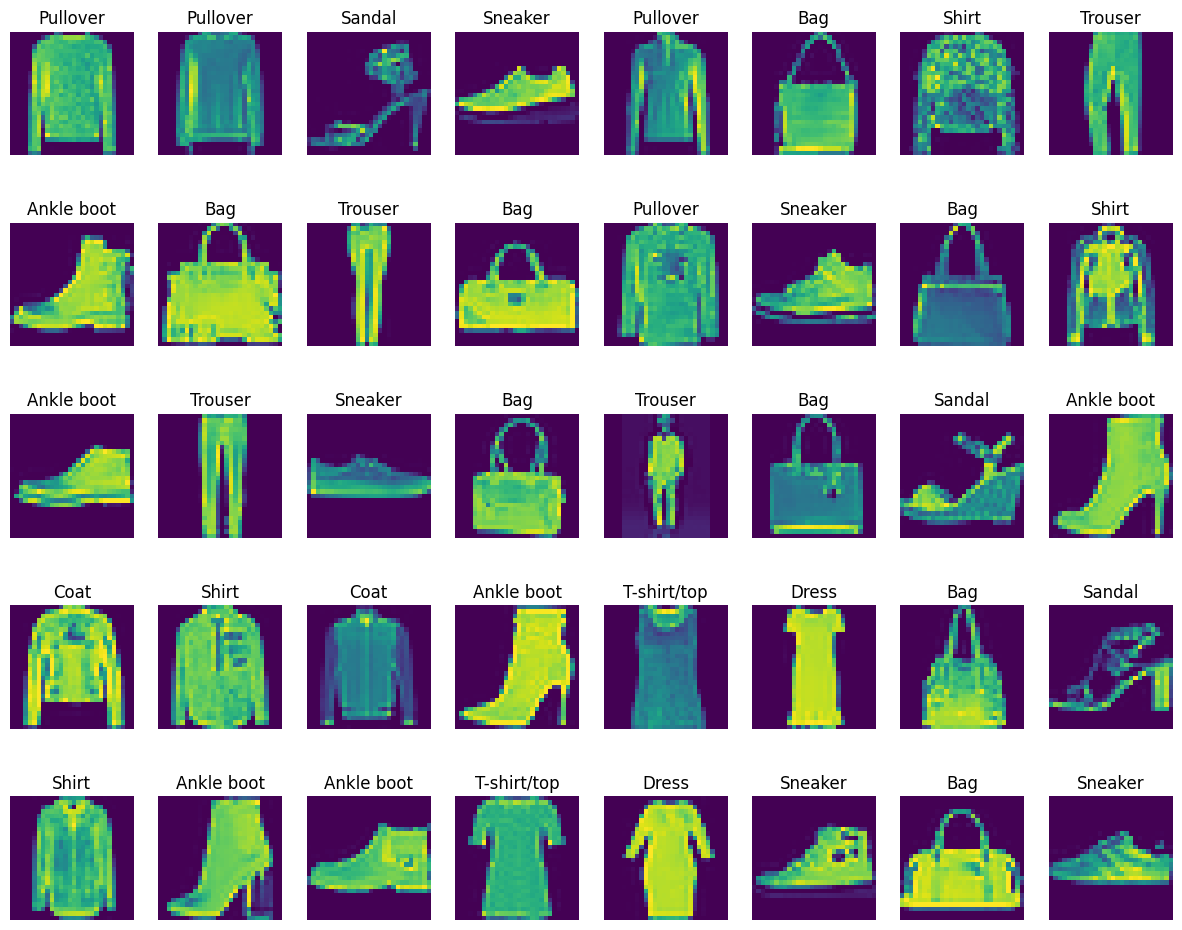

In [ ]:
# Select random indices
random_indices = np.random.choice(len(X_train), size=40, replace=False)

# Plot the images
plt.figure(figsize=(15, 12))
for i, index in enumerate(random_indices):
    plt.subplot(5, 8, i+1)
    plt.imshow(X_train[index])
    plt.title(class_names[y_train[index]])
    plt.axis('off')
plt.show()

# Preprocessing

## Expand Dimension

In [ ]:
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

## Scaling

In [ ]:
# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# CNN Modeling

In [ ]:
model = Sequential([
    ZeroPadding2D(padding=(1, 1), input_shape=(28, 28, 1), name='zero_padding2d_1'),
    Conv2D(32, 3, activation='relu', name='conv2d_1'),
    Dropout(0.2, name='dropout_1'),
    MaxPool2D(pool_size=2, strides=2, name='max_pooling2d_1'),
    ZeroPadding2D(padding=(1, 1), name='zero_padding2d_2'),
    Conv2D(64, 3, activation='relu', name='conv2d_2'),
    Dropout(0.2, name='dropout_2'),
    MaxPool2D(pool_size=2, strides=2, name='max_pooling2d_2'),
    Flatten(name='flatten_1'),
    Dense(128, activation='relu', name='dense_1'),
    Dropout(0.5, name='dropout_3'),
    Dense(10, activation='softmax', name='dense_2'),
    ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_1 (ZeroPadd  (None, 30, 30, 1)         0         
 ing2D)                                                          
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 dropout_1 (Dropout)         (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 zero_padding2d_2 (ZeroPadd  (None, 16, 16, 32)        0         
 ing2D)                                                          
                                                        

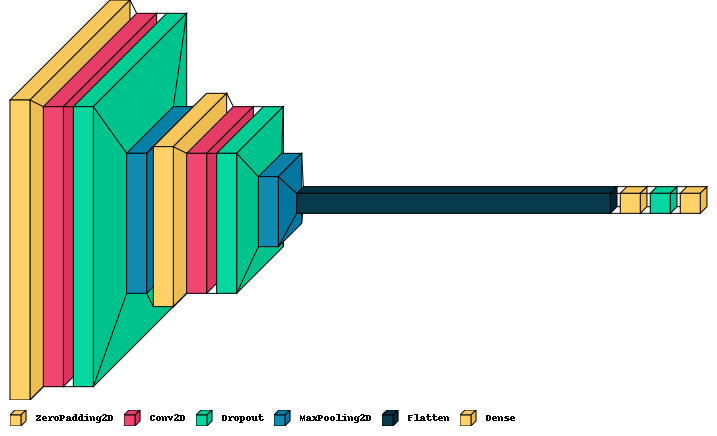

In [ ]:
visualkeras.layered_view(model, scale_xy=10, legend=True)

In [ ]:
# Create directory to save feature maps if it doesn't exist
output_dir = 'feature_maps'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Define the custom callback
class FeatureMapCallback(Callback):
    def __init__(self, model, validation_data, output_dir):
        self.model = model
        self.validation_data = validation_data
        self.outputs = [layer.output for layer in model.layers]
        self.model_with_outputs = Model(inputs=model.input, outputs=self.outputs)
        self.output_dir = output_dir

    def on_epoch_end(self, epoch, logs=None):
        val_sample = self.validation_data[0][:1]  # Take the first sample from the validation data
        feature_maps = self.model_with_outputs.predict(val_sample)

        for layer_name, feature_map in zip([layer.name for layer in self.model.layers], feature_maps):
            # Save the feature map to a file
            file_path = os.path.join(self.output_dir, f"epoch_{epoch + 1}_layer_{layer_name}.npy")
            np.save(file_path, feature_map)

In [ ]:
# One Hot Encoding ---> Lable
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)
print('y_train_one_hot.shape: ', y_train_ohe.shape)
print('y_test_one_hot.shape: ', y_test_ohe.shape)

y_train_one_hot.shape:  (60000, 10)
y_test_one_hot.shape:  (10000, 10)


In [ ]:
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Create an instance of the callback
feature_map_callback = FeatureMapCallback(model, (X_test, y_test_ohe), output_dir)

# training phase
history = model.fit(X_train, y_train_ohe, epochs=5, validation_data=(X_test, y_test_ohe), batch_size=300, callbacks=[feature_map_callback])

# saved feature maps after training
for epoch in range(5):
    for layer in model.layers:
        file_path = os.path.join(output_dir, f"epoch_{epoch + 1}_layer_{layer.name}.npy")

Epoch 1/5
  4/200 [..............................] - ETA: 3s - loss: 2.1297 - accuracy: 0.2683   

200/200 [==============================] - 17s 21ms/step - loss: 0.6632 - accuracy: 0.7627 - val_loss: 0.4348 - val_accuracy: 0.8517
Epoch 2/5
200/200 [==============================] - 3s 17ms/step - loss: 0.4184 - accuracy: 0.8514 - val_loss: 0.3757 - val_accuracy: 0.8756
Epoch 3/5
200/200 [==============================] - 3s 17ms/step - loss: 0.3671 - accuracy: 0.8700 - val_loss: 0.3301 - val_accuracy: 0.8837
Epoch 4/5
200/200 [==============================] - 2s 12ms/step - loss: 0.3369 - accuracy: 0.8802 - val_loss: 0.3233 - val_accuracy: 0.8853
Epoch 5/5
200/200 [==============================] - 2s 11ms/step - loss: 0.3125 - accuracy: 0.8870 - val_loss: 0.2961 - val_accuracy: 0.8936


In [ ]:
# classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
report = classification_report(y_test, y_pred_classes, target_names=class_names)
print(report)

313/313 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.85      0.84      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.80      0.86      0.83      1000
       Dress       0.87      0.92      0.90      1000
        Coat       0.84      0.75      0.79      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.71      0.71      0.71      1000
     Sneaker       0.94      0.95      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



<Axes: >

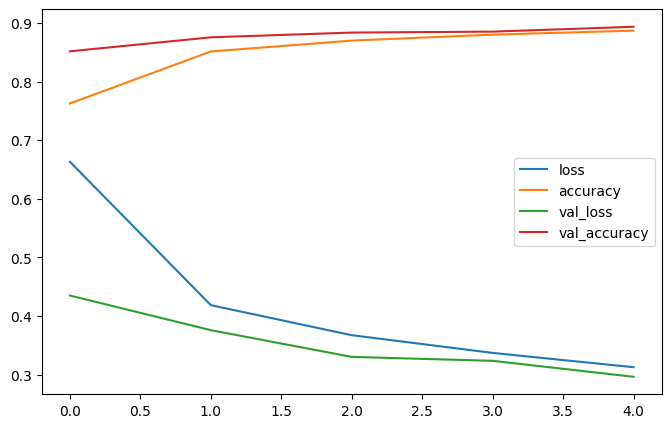

In [ ]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'
pd.DataFrame(history.history).plot(figsize=(8,5))

In [ ]:
model.save('CNN_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!zip -r feature_maps.zip feature_maps

  adding: feature_maps/ (stored 0%)
  adding: feature_maps/epoch_4_layer_dropout_2.npy (deflated 67%)
  adding: feature_maps/epoch_1_layer_flatten_1.npy (deflated 39%)
  adding: feature_maps/epoch_3_layer_conv2d_1.npy (deflated 64%)
  adding: feature_maps/epoch_3_layer_dropout_3.npy (deflated 52%)
  adding: feature_maps/epoch_5_layer_flatten_1.npy (deflated 49%)
  adding: feature_maps/epoch_5_layer_max_pooling2d_1.npy (deflated 54%)
  adding: feature_maps/epoch_4_layer_max_pooling2d_1.npy (deflated 55%)
  adding: feature_maps/epoch_5_layer_dropout_2.npy (deflated 69%)
  adding: feature_maps/epoch_4_layer_dense_2.npy (deflated 33%)
  adding: feature_maps/epoch_5_layer_conv2d_1.npy (deflated 64%)
  adding: feature_maps/epoch_4_layer_zero_padding2d_1.npy (deflated 77%)
  adding: feature_maps/epoch_1_layer_dense_1.npy (deflated 47%)
  adding: feature_maps/epoch_4_layer_zero_padding2d_2.npy (deflated 65%)
  adding: feature_maps/epoch_4_layer_dense_1.npy (deflated 52%)
  adding: feature_maps

# Visualize feature maps

## First Setup

In [ ]:
# Function to visualize feature maps for a specific layer and image
def visualize_feature_maps(model, layer_index, image_index, test_images):
    layer = model.layers[layer_index]
    feature_model = Model(inputs=model.inputs, outputs=layer.output)

    img = test_images[image_index].reshape(1, 28, 28, 1)

    feature_maps = feature_model.predict(img)

    num_filters = feature_maps.shape[-1]
    size = feature_maps.shape[1]

    square = int(np.ceil(np.sqrt(num_filters)))
    fig, axes = plt.subplots(square, square, figsize=(12, 12))
    fig.suptitle(f"Feature maps of layer {layer.name}")

    for i in range(square * square):
        ax = axes[i // square, i % square]
        if i < num_filters:
            feature_map = feature_maps[0, :, :, i]
            ax.imshow(feature_map, cmap='gray')
            ax.axis('off')
        else:
            ax.axis('off')

    plt.show()

1/1 [==============================] - 0s 123ms/step


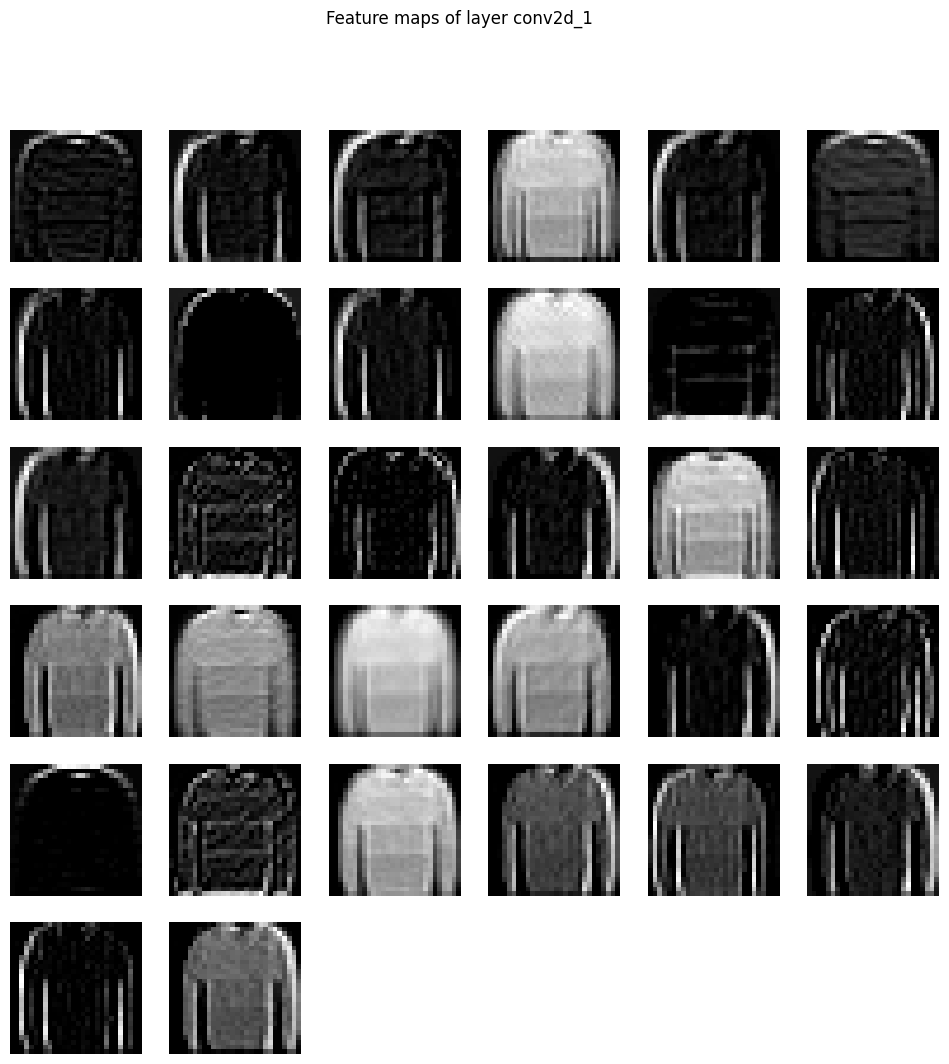

1/1 [==============================] - 0s 45ms/step


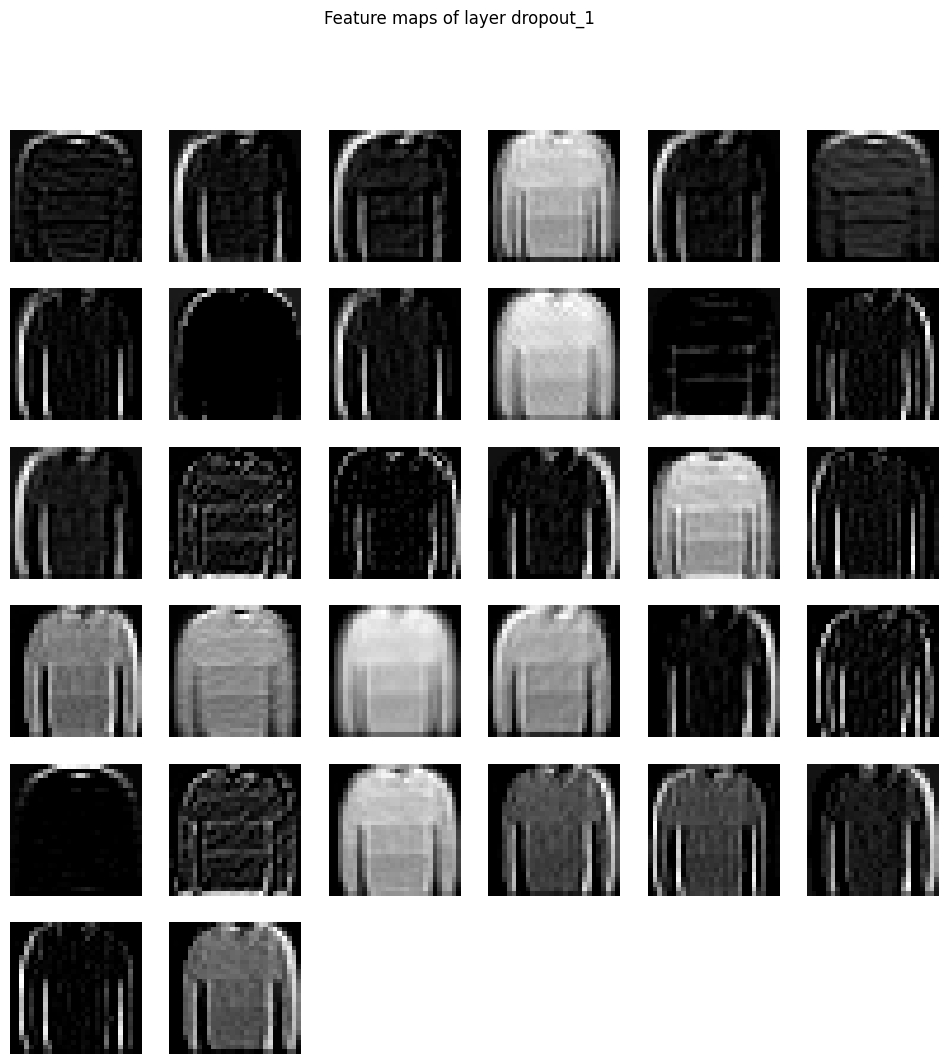

1/1 [==============================] - 0s 55ms/step


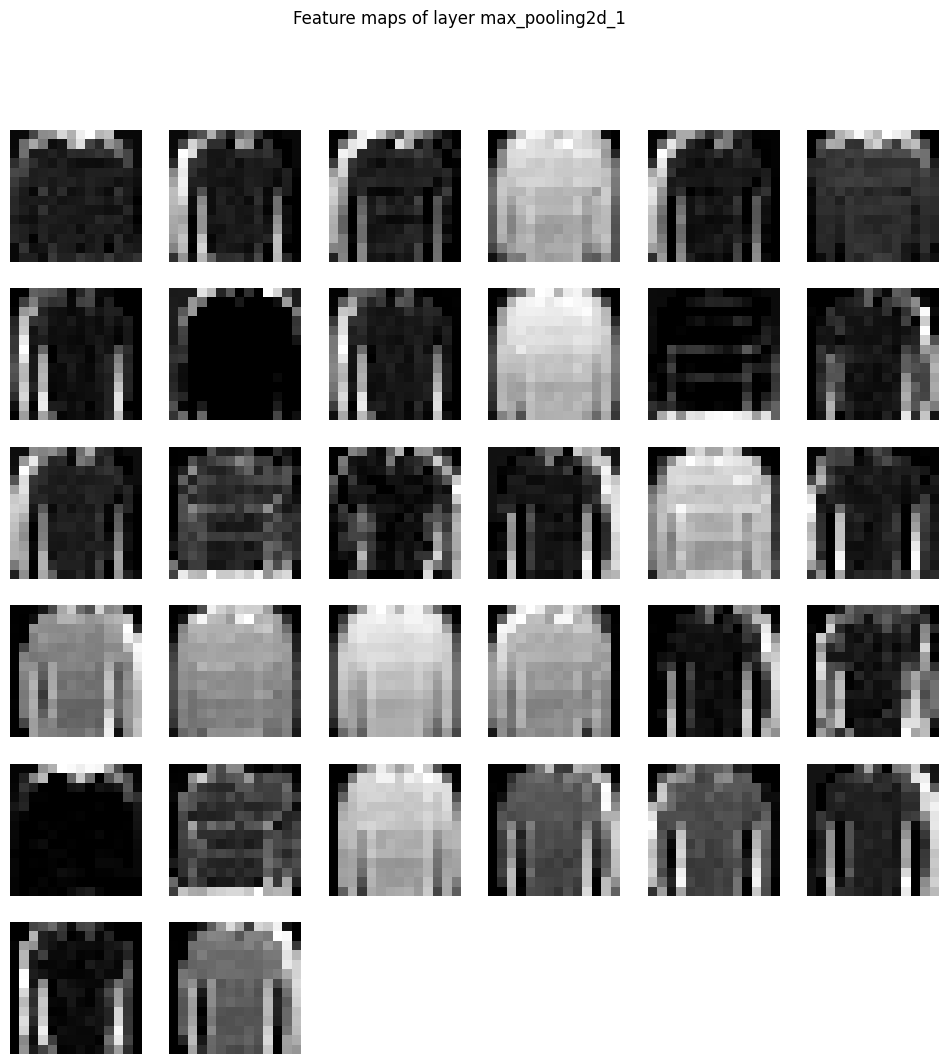

1/1 [==============================] - 0s 50ms/step


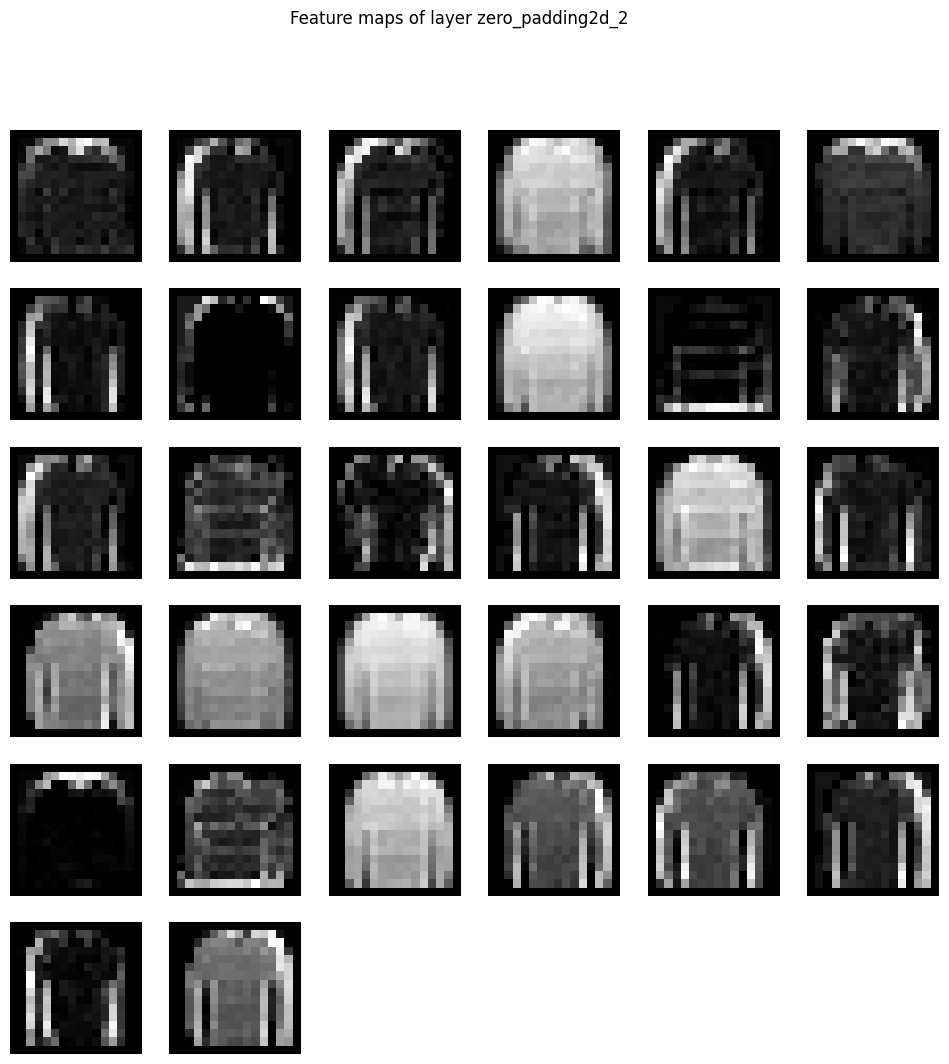

1/1 [==============================] - 0s 103ms/step


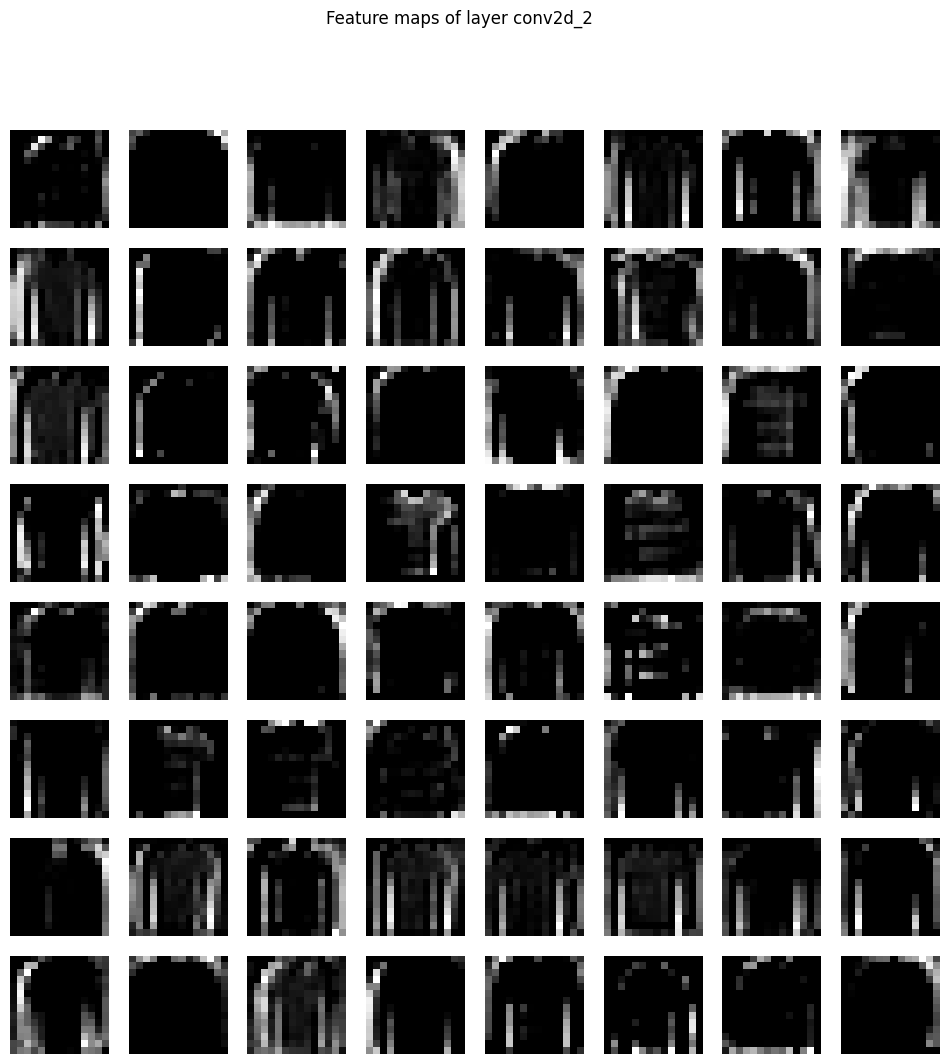

1/1 [==============================] - 0s 119ms/step


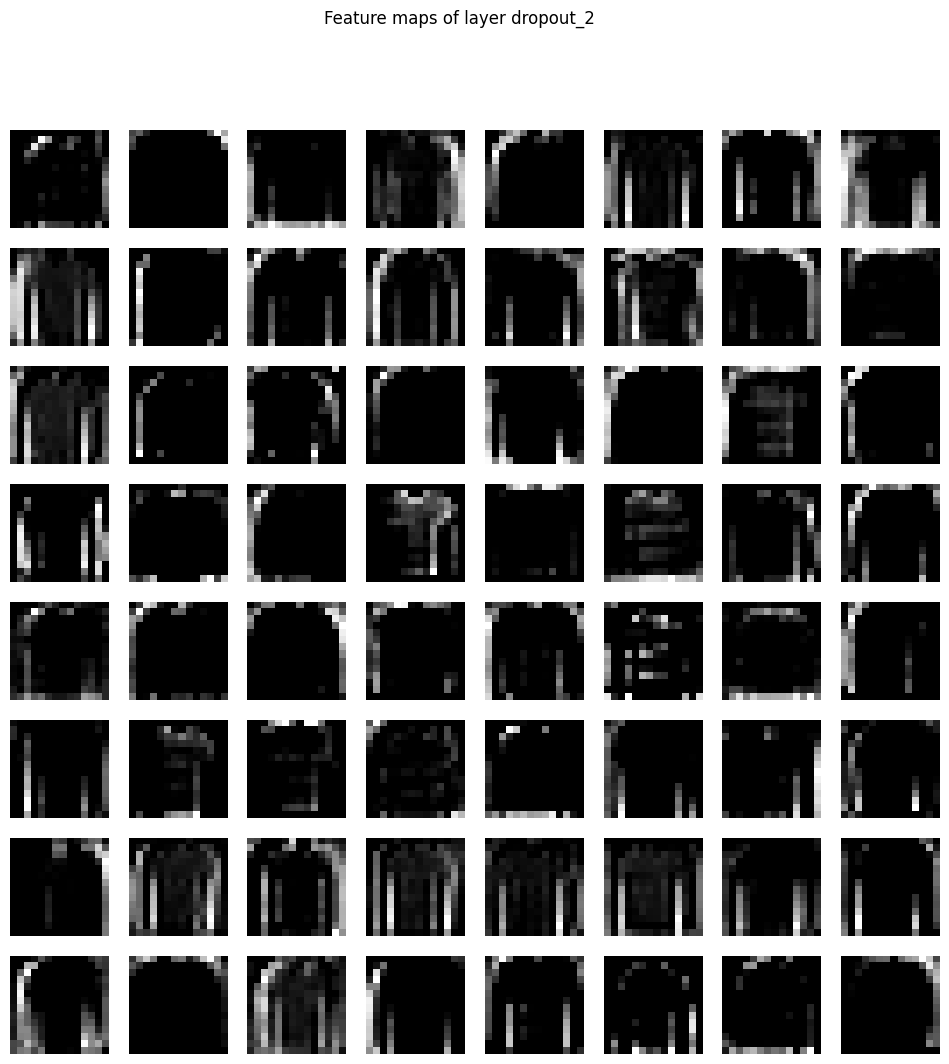

1/1 [==============================] - 0s 78ms/step


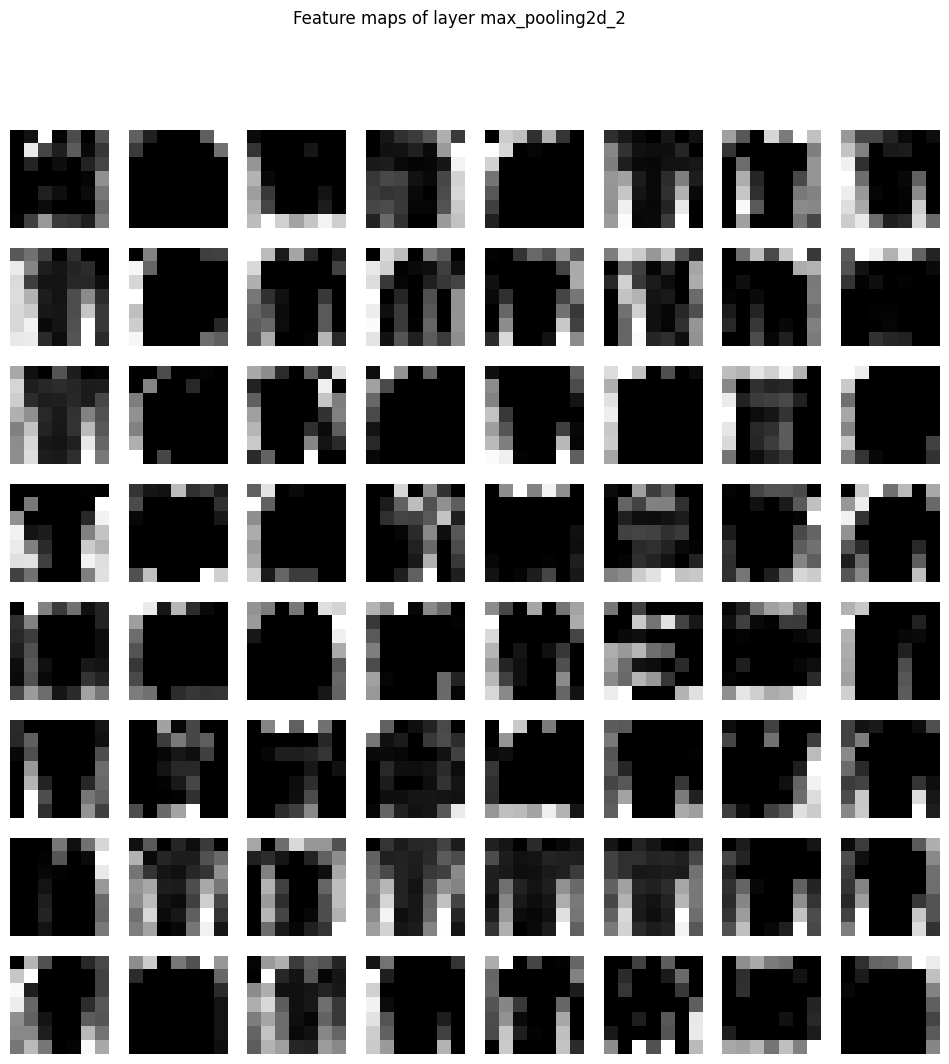

In [ ]:
# Visualize feature maps for a specific layer and image
image_index = 20  # You can change this index to visualize different images
for layer_index in range(1, 8):  # You can change this index to visualize different layers
  visualize_feature_maps(model, layer_index, image_index, X_test)


## Second Setup

In [ ]:
# Define the visualization function
def visualize_feature_maps_2(model, image_index, test_images):
    successive_outputs = [layer.output for layer in model.layers[1:]]
    visualization_model = Model(inputs=model.input, outputs=successive_outputs)

    plt.imshow(test_images[image_index].reshape(28, 28), cmap=plt.cm.binary)
    x = test_images[image_index]
    x = x.reshape((1,) + x.shape)

    successive_feature_maps = visualization_model.predict(x)
    layer_names = [layer.name for layer in model.layers[1:]]

    for layer_name, feature_map in zip(layer_names, successive_feature_maps):
        if len(feature_map.shape) == 4:
            n_features = feature_map.shape[-1]
            size = feature_map.shape[1]
            display_grid = np.zeros((size, size * n_features))
            for i in range(n_features):
                x = feature_map[0, :, :, i]
                x -= x.mean()
                x /= x.std()
                x *= 64
                x += 128
                x = np.clip(x, 0, 255).astype('uint8')
                display_grid[:, i * size : (i + 1) * size] = x

            scale = 20. / n_features
            plt.figure(figsize=(scale * n_features, scale))
            plt.title(layer_name)
            plt.grid(False)
            plt.imshow(display_grid, aspect='auto', cmap='viridis')
            plt.show()

1/1 [==============================] - 0s 141ms/step


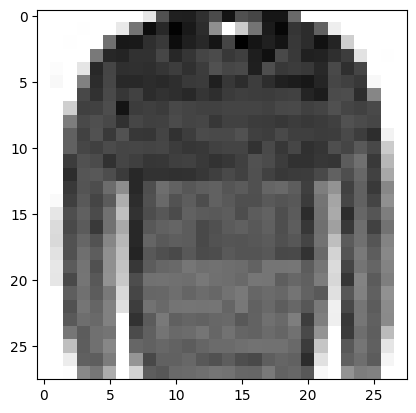

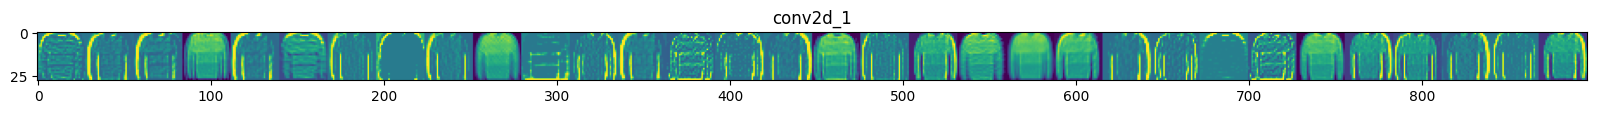

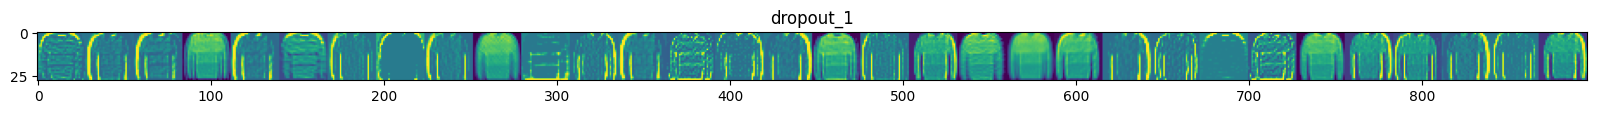

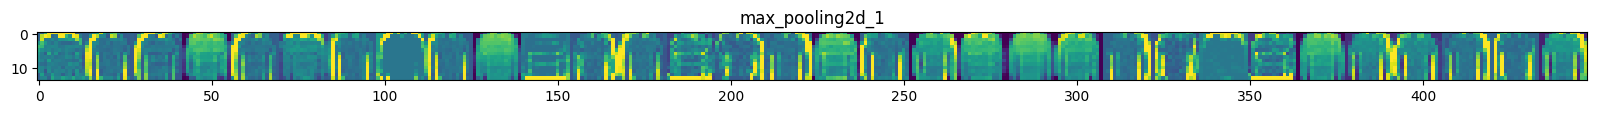

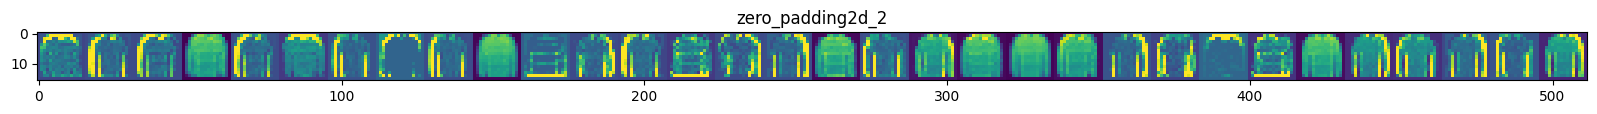

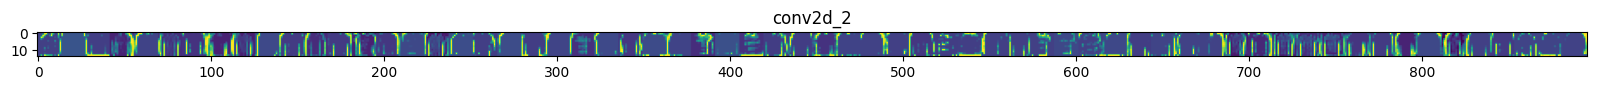

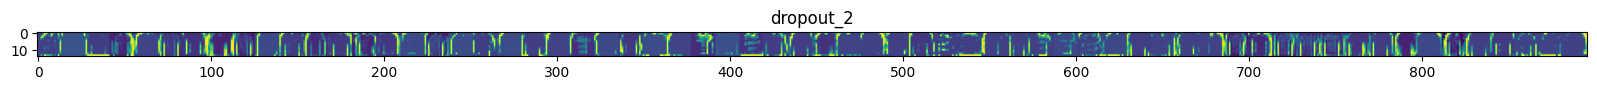

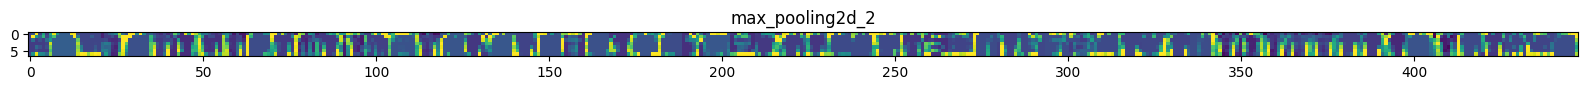

In [ ]:
# Visualize feature maps for a specific image
image_index = 20  # You can change this index to visualize different images
visualize_feature_maps_2(model, image_index, X_test)

Feature maps were analyzed at various stages of the network:
1. **First Layer**: These feature maps capture basic edges and textures.
2. **Intermediate Layer**: These feature maps start to capture more complex patterns and parts of the clothing items.
3. **Last Layer**: These feature maps are highly abstract and represent the learned features that contribute to the final classification decision.

The differences among these feature maps highlight how the CNN progressively learns and abstracts features from raw pixel values to high-level concepts.

# Evaluation with New Image

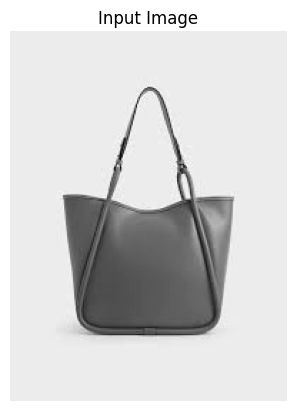

1/1 [==============================] - 0s 18ms/step
Predicted class: Bag


In [ ]:
# Download and preprocess the image
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRhPgfPU_WORxUqTfLmCuGc7i0cbEzklz3b9g&s'
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert('L')

# Display the image
plt.imshow(img, cmap='gray')
plt.title('Input Image')
plt.axis('off')
plt.show()

img = img.resize((28, 28))


# Preprocess the image
img_array = np.array(img)
img_array = img_array / 255.0  # Normalize the image
img_array = np.expand_dims(img_array, axis=-1)  # Add channel dimension
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict the class of the image
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)
print(f"Predicted class: {class_names[predicted_class[0]]}")


In [ ]:
# Function to visualize feature maps for a specific layer and image
def visualize_feature_maps(model, layer_index, image_array):
    layer = model.layers[layer_index]
    feature_model = Model(inputs=model.inputs, outputs=layer.output)

    feature_maps = feature_model.predict(image_array)

    num_filters = feature_maps.shape[-1]
    size = feature_maps.shape[1]

    square = int(np.ceil(np.sqrt(num_filters)))
    fig, axes = plt.subplots(square, square, figsize=(12, 12))
    fig.suptitle(f"Feature maps of layer {layer.name}")

    for i in range(square * square):
        ax = axes[i // square, i % square]
        if i < num_filters:
            feature_map = feature_maps[0, :, :, i]
            ax.imshow(feature_map, cmap='gray')
            ax.axis('off')
        else:
            ax.axis('off')

    plt.show()

1/1 [==============================] - 0s 36ms/step


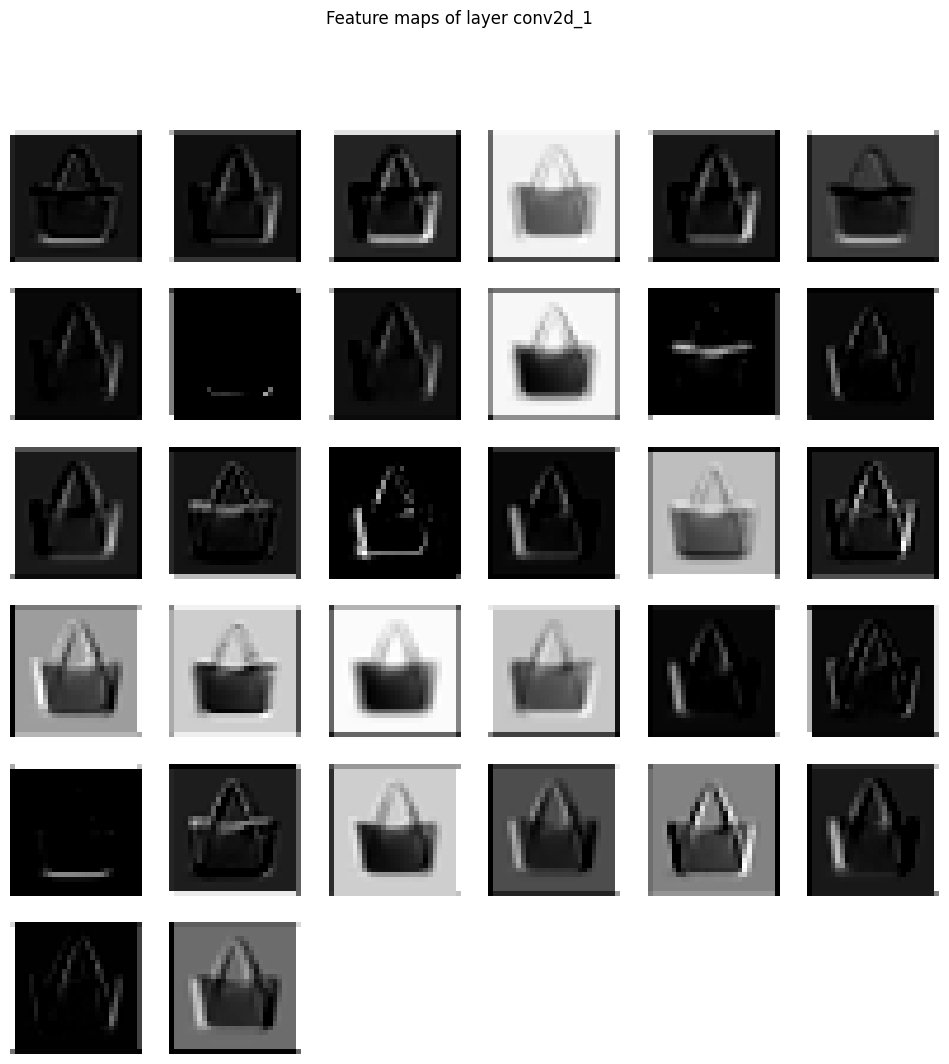

1/1 [==============================] - 0s 41ms/step


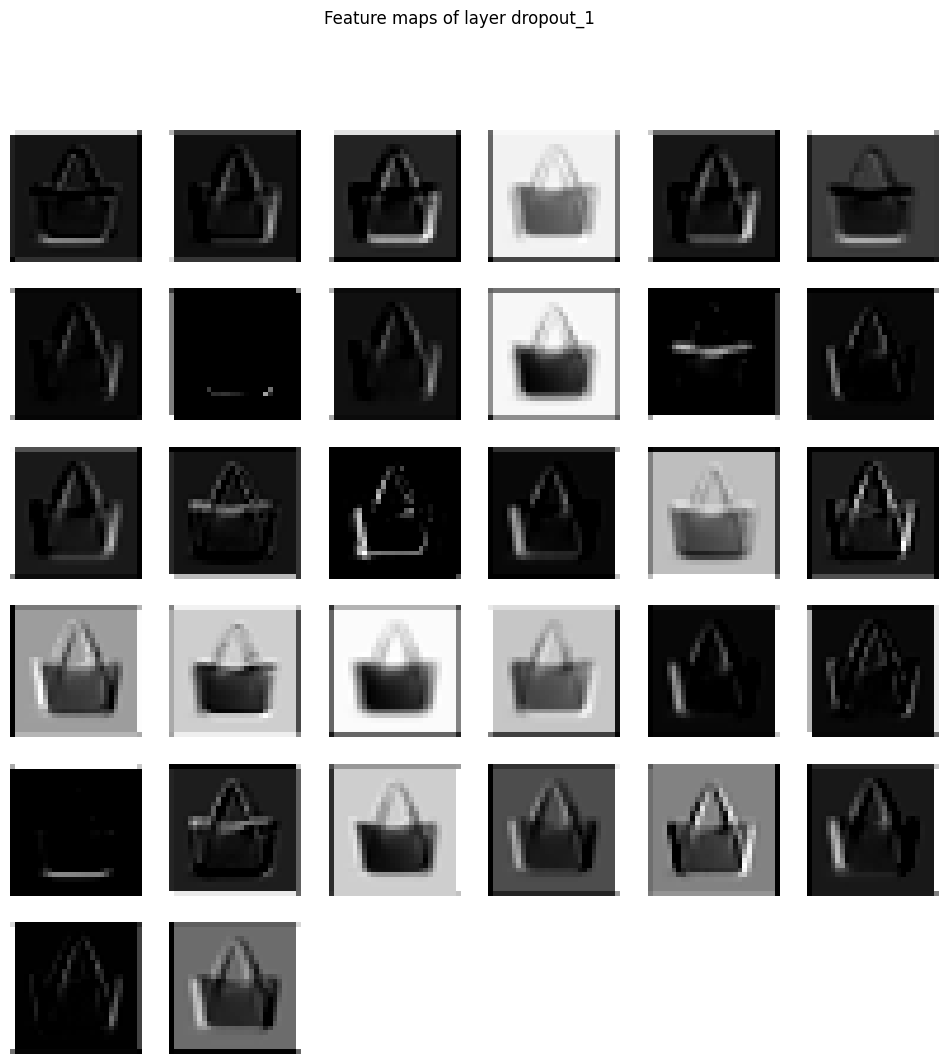

1/1 [==============================] - 0s 62ms/step


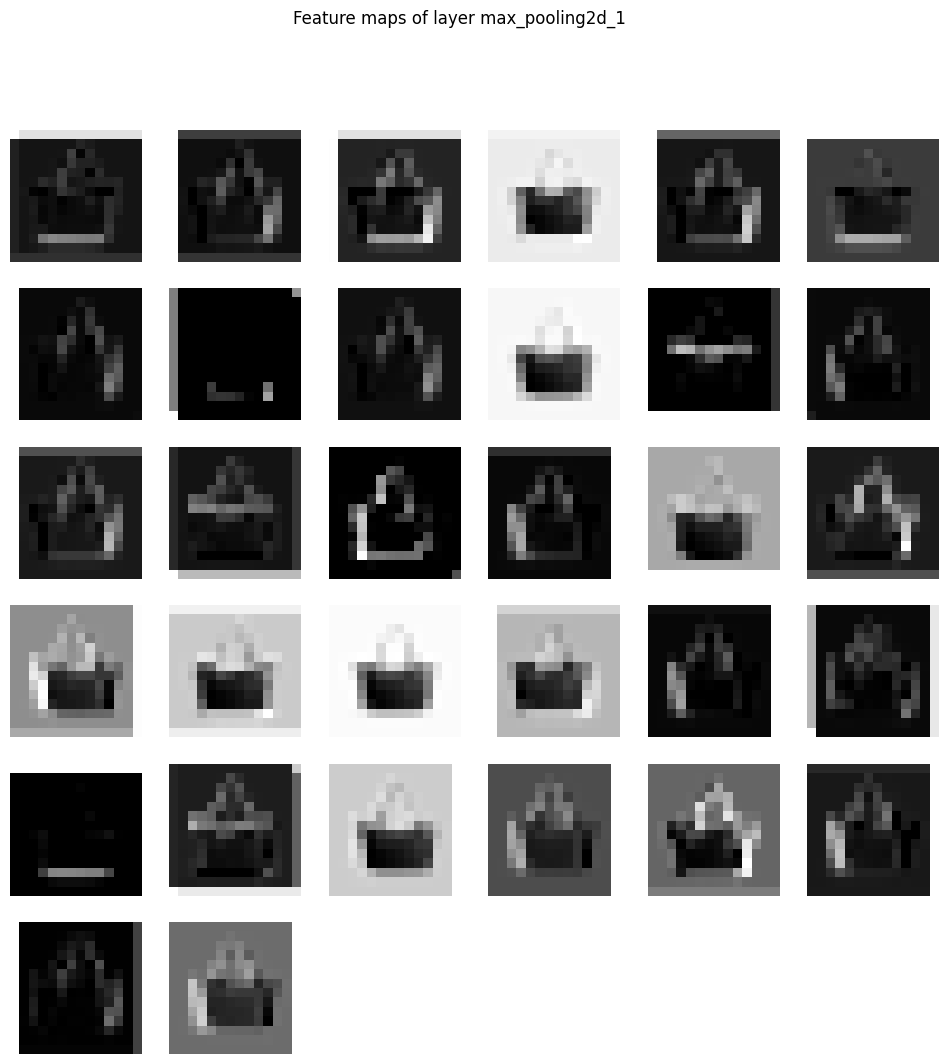

1/1 [==============================] - 0s 72ms/step


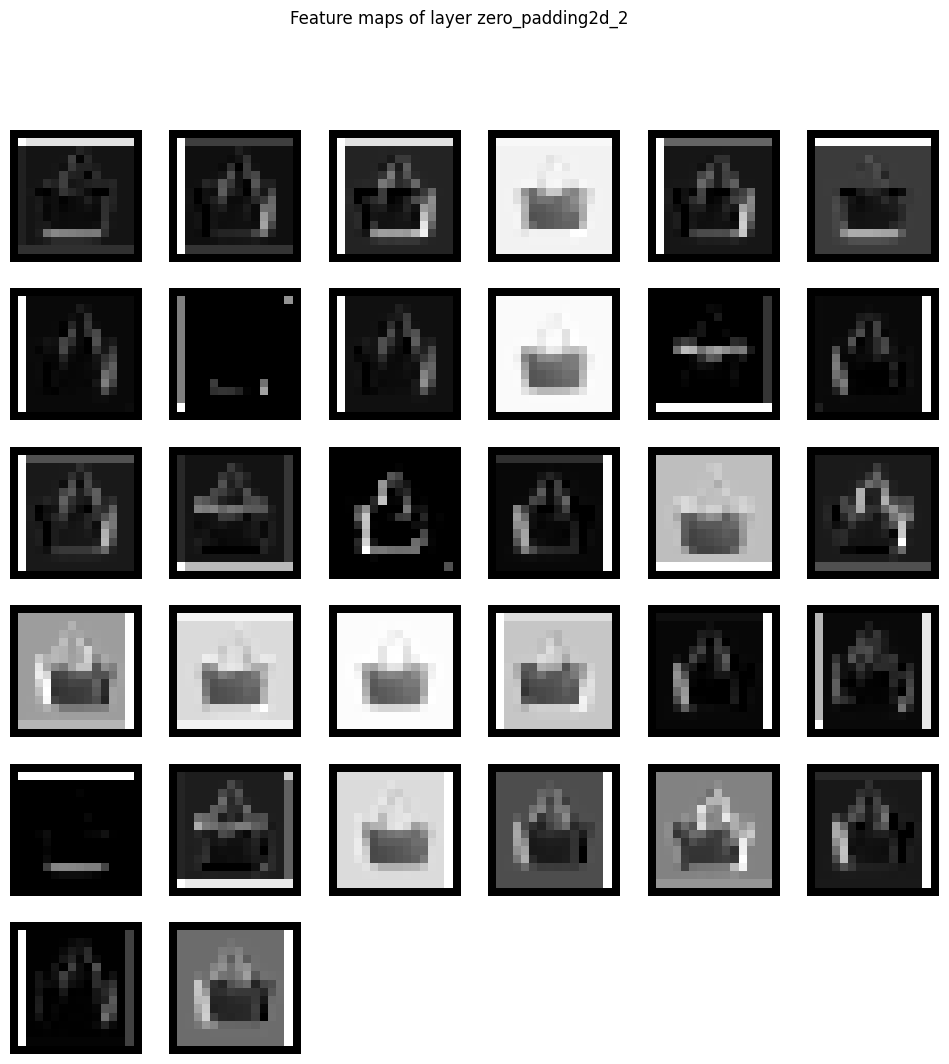

1/1 [==============================] - 0s 56ms/step


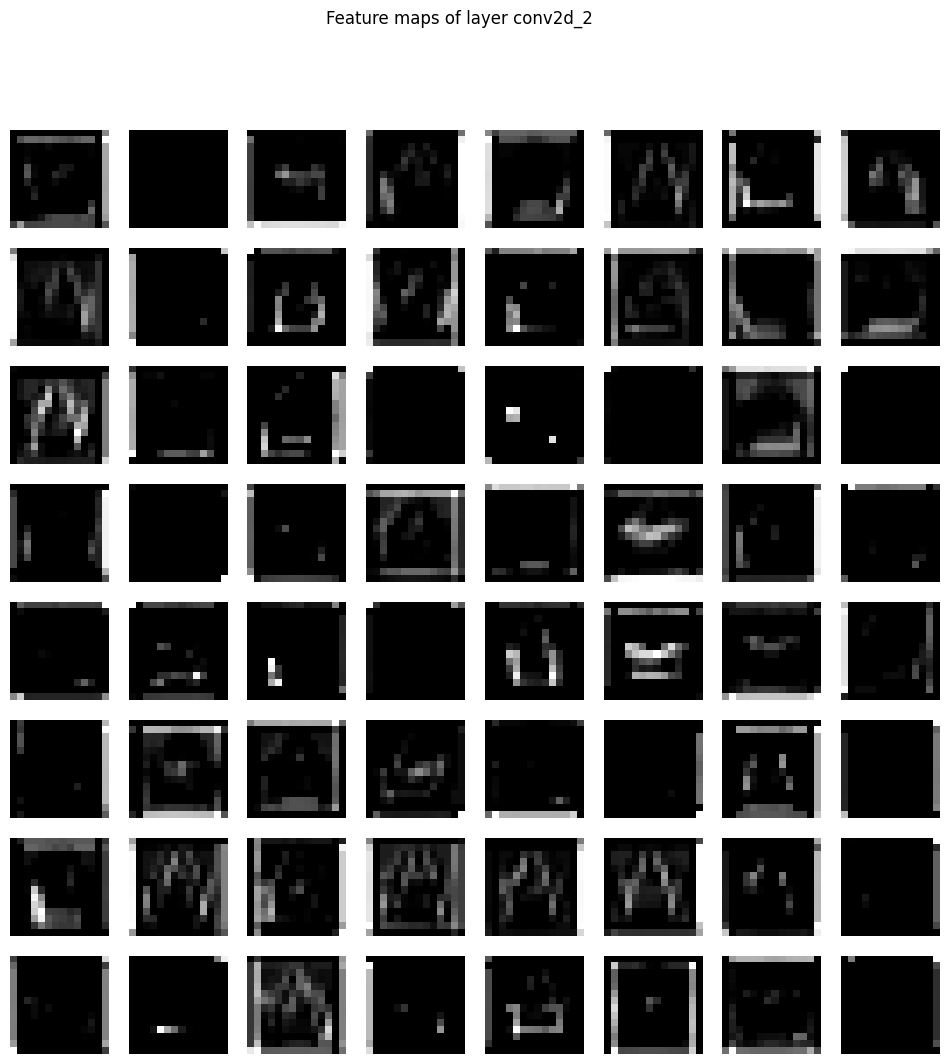

1/1 [==============================] - 0s 57ms/step


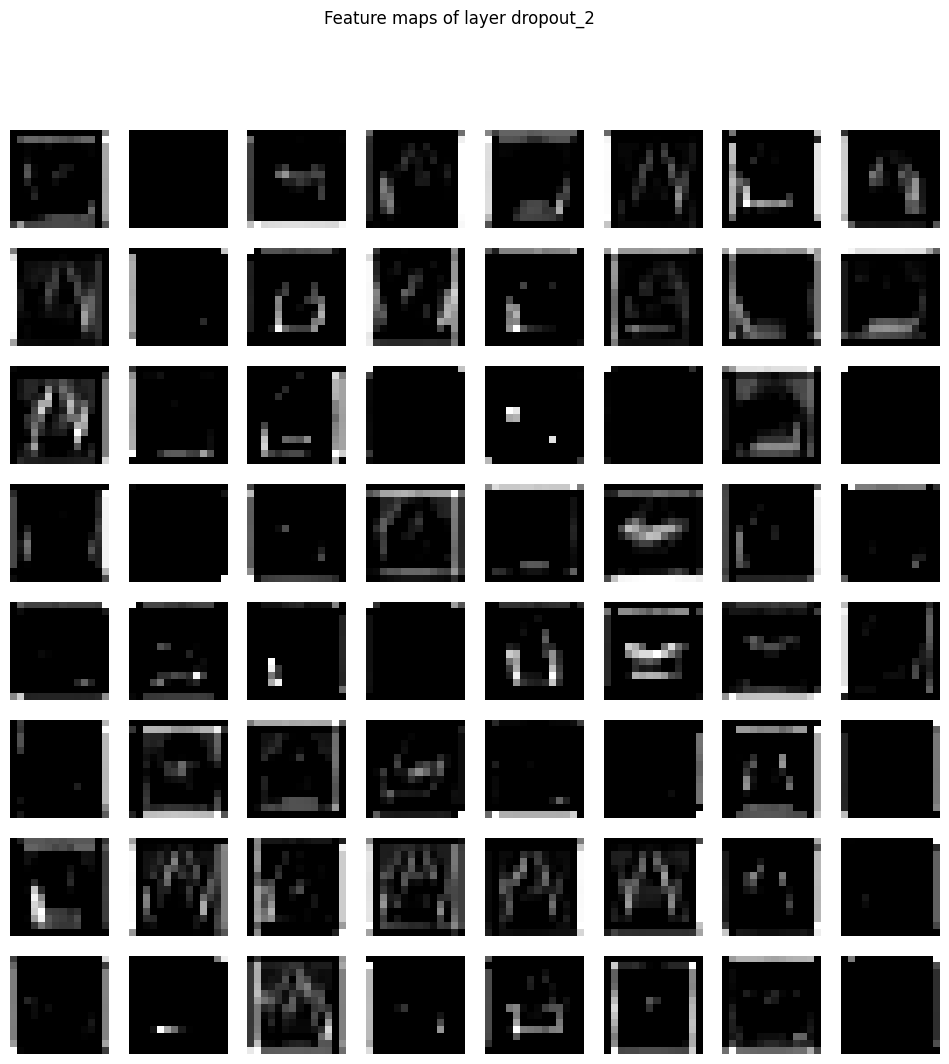

1/1 [==============================] - 0s 61ms/step


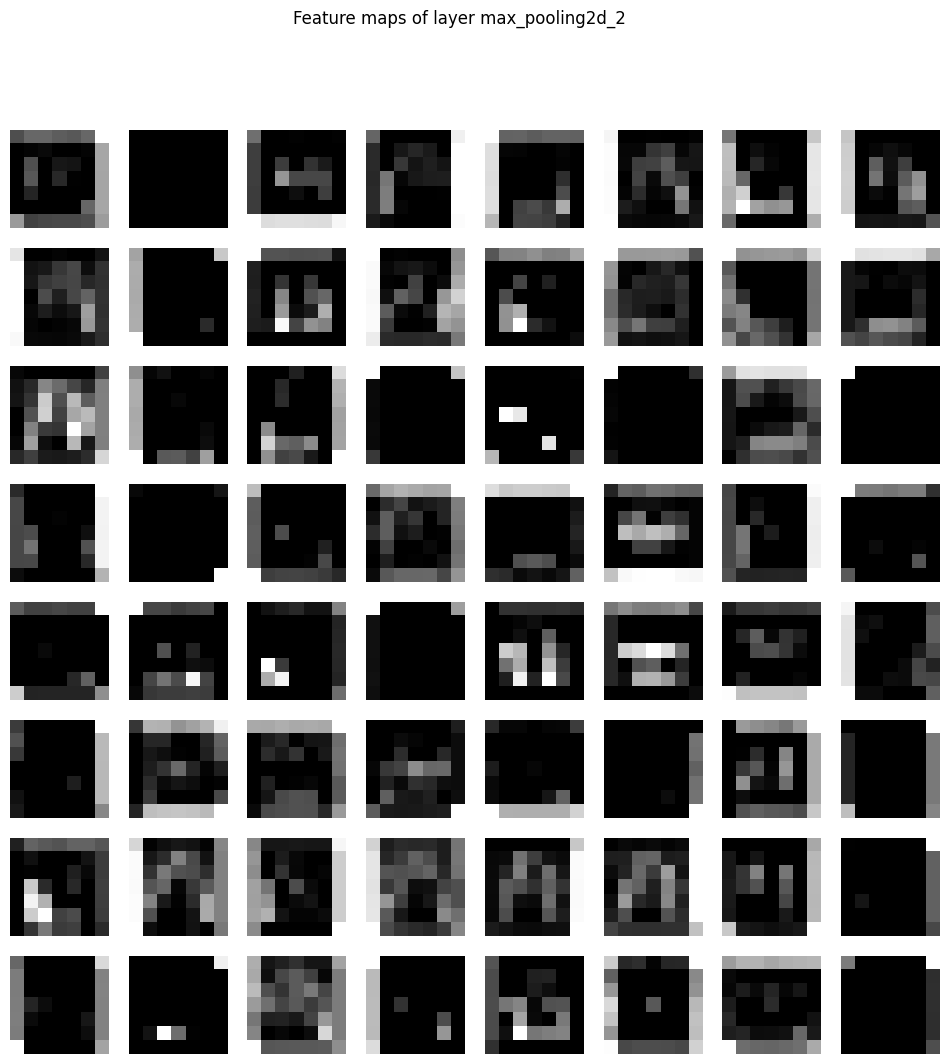

In [ ]:
for layer_index in range(1, 8):  # You can change this index to visualize different layers
  visualize_feature_maps(model, layer_index, img_array)

# Conclusion

In neural networks, the final layers activate only those features that are important for class recognition. As seen from the output of the final layers, only a few features or pixels in the abstract space at the end of the network are activated. This indicates that the outputs of the final layers contain less information from the original input image pixels, but instead, they retain precise information about the key pixels that determine the output class. Therefore, it can be said that the images resulting from the initial layers are closer to the original input image, while the outputs of the final layers, by highlighting specific features in an abstract and compressed space, determine the type of output class.